In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:

# Función Black-Scholes
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


In [5]:
# Test
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2

# Precios de ejemplo
call_price = black_scholes_price(S0, K, T, r, sigma, 'call')
put_price = black_scholes_price(S0, K, T, r, sigma, 'put')
print("Call:", call_price)
print("Put:", put_price)

Call: 10.450583572185565
Put: 5.573526022256971


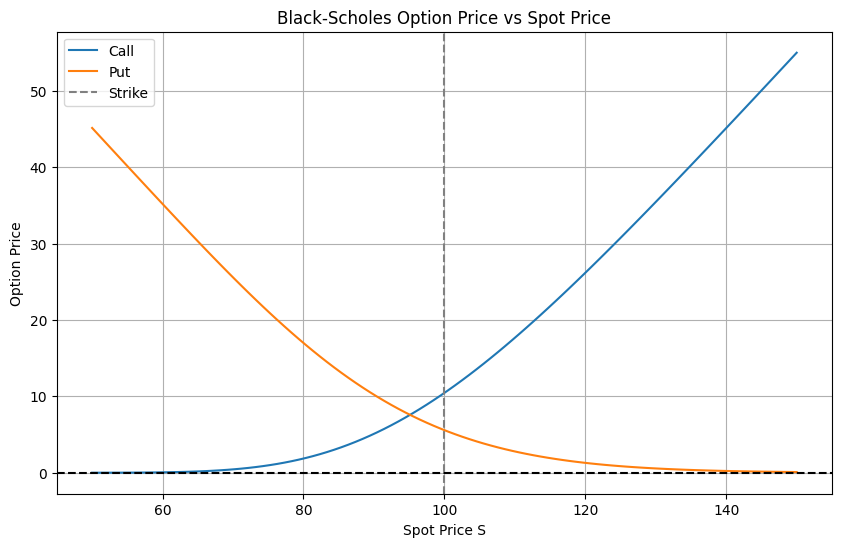

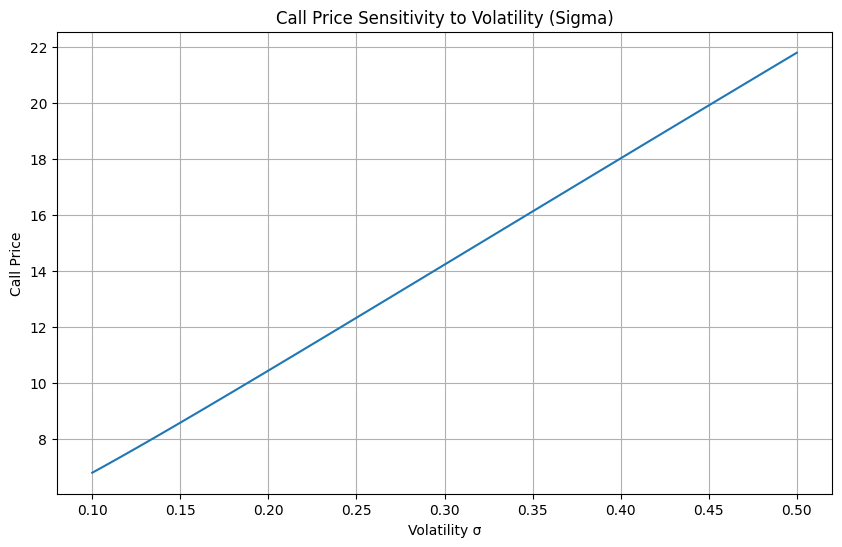

In [6]:
# Gráfico del payoff según precio del subyacente
S_range = np.linspace(50, 150, 100)
call_prices = [black_scholes_price(s, K, T, r, sigma, 'call') for s in S_range]
put_prices = [black_scholes_price(s, K, T, r, sigma, 'put') for s in S_range]

plt.figure(figsize=(10,6))
plt.plot(S_range, call_prices, label='Call')
plt.plot(S_range, put_prices, label='Put')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(K, color='gray', linestyle='--', label='Strike')
plt.title('Black-Scholes Option Price vs Spot Price')
plt.xlabel('Spot Price S')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

# Sensibilidad: cambio de precio de la call según volatilidad
sigmas = np.linspace(0.1, 0.5, 50)
call_vol_sensitivity = [black_scholes_price(S0, K, T, r, s, 'call') for s in sigmas]

plt.figure(figsize=(10,6))
plt.plot(sigmas, call_vol_sensitivity)
plt.title('Call Price Sensitivity to Volatility (Sigma)')
plt.xlabel('Volatility σ')
plt.ylabel('Call Price')
plt.grid(True)
plt.show()